In [7]:
from numpy import *
import matplotlib.pyplot as plt 
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import preprocessing
import pandas as pd
from joblib import dump,load
import requests,json

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
#df = pd.read_csv("NoSqli_Dataset.csv")
df = pd.read_csv("/content/drive/MyDrive/Thesis Resources/dataset/NoSql_Injection/NoSqli_Dataset.csv")
df.head()

,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,ClassLabel
0,0,0,0,1,1,0,0,0,0,0,0
1,1,1,0,1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [10]:

X = df.drop(['ClassLabel'],axis='columns')
Y = df['ClassLabel']

In [11]:
Y.value_counts()

0    801
1    203
Name: ClassLabel, dtype: int64

In [12]:
X.head(2)

,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9
0,0,0,0,1,1,0,0,0,0,0
1,1,1,0,1,0,0,0,0,0,0


In [13]:
Y.head(5)

0    0
1    1
2    0
3    0
4    0
Name: ClassLabel, dtype: int64

# Evaluation of Best Classification Model Using GridSearchCV(with handling imbalanced data)

In [14]:
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',class_weight='balanced'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear','poly']
        }  
    },
    'decision_tree': {
        'model': tree.DecisionTreeClassifier(class_weight='balanced'),
        'params' : {
            'criterion':["gini","entropy"],
            'max_depth':[1,2,3,4,5,6,7,None]
        }
    },
    'Adaboost':{
        'model':AdaBoostClassifier(base_estimator = tree.DecisionTreeClassifier(random_state = 11, max_features = "auto",max_depth = None,class_weight='balanced')),
        'params':{
              'base_estimator__criterion' : ["gini", "entropy"],
              'base_estimator__splitter' :   ["best", "random"],
              'n_estimators': [1, 2]
             }
    },

    'random_forest': {
        'model': RandomForestClassifier(class_weight = 'balanced'),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto',class_weight = 'balanced'),
        'params': {
            'C': [1,5,10]
        }
    },
    'Naive_Bayes:BernoulliNB':{
        'model':BernoulliNB(),
        'params':{
            'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
        }
    },
}

Apply transformations to dataset

In [15]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import ClusterCentroids,NearMiss, RandomUnderSampler
from imblearn.combine import SMOTEENN,SMOTETomek
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

def transform(transformer,X,Y):
    print("Transforming {}".format(transformer.__class__.__name__))
    X_resampled,Y_resampled = transformer.fit_sample(X.values,Y.values.ravel())
    return transformer.__class__.__name__,pd.DataFrame(X_resampled), pd.DataFrame(Y_resampled)

datasets = []
datasets.append(("base",X,Y))
datasets.append(transform(SMOTE(n_jobs=-1),X,Y))
datasets.append(transform(RandomOverSampler(),X,Y))
datasets.append(transform(NearMiss(n_jobs=-1),X,Y))
datasets.append(transform(RandomUnderSampler(),X,Y))
datasets.append(transform(SMOTEENN(),X,Y))
datasets.append(transform(SMOTETomek(),X,Y))

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Transforming SMOTE
Transforming RandomOverSampler
Transforming NearMiss


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Transforming RandomUnderSampler
Transforming SMOTEENN
Transforming SMOTETomek


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Model Serialization

In [21]:
## As Adaboost is performing best among all the models we are storing Adaboost
## classifier object in the file to deploy it in the server
def saveModel(model_object,model_name):
    dump(model_object,model_name+'.joblib')

def loadModel(model_name):
    model_object= load(model_name)
    return model_object

def checkSavedClassifierResults():
    adaboostModel =loadModel('Adaboost.joblib')
    result= adaboostModel.best_estimator_.predict([[1,1,0,1,	0,	0,	0,	0,	0,	0]])
    print(result)

checkSavedClassifierResults()

[1]


In [18]:


def getBestClassifierObject(model_name,sampling_type,classifierObject):
   
    if(model_name=='Adaboost' and sampling_type=='SMOTEENN'):
        print('helloooooooooooooooooooooooooooooooooooooooo')
        #print(classifierObject)
        saveModel(classifierObject,model_name)


def benchmark(sampling_type,x,y):
    #lr = LogisticRegression(penalty = 'l2')
    #param_grid = {'C':[0.01,0.1,1,10]}
    scores = []

    target_names = ['Not Malicious', 'Malicious']
    ConfusionMatrix={}

    for model_name, mp in model_params.items():
        grid =  GridSearchCV(estimator=mp['model'],param_grid= mp['params'],scoring='accuracy', cv=10,n_jobs=-1,verbose=2)
        grid = grid.fit(x, y)
        
        getBestClassifierObject(model_name,sampling_type,grid)

        y_pred=grid.best_estimator_.predict(x)
        print('-------------------------------------------')
        print(model_name.upper())  
        print('-------------------------------------------')
        report=classification_report(y, y_pred, target_names=target_names,output_dict=True)
        print(report)
        ConfusionMatrix[model_name]  =  confusion_matrix(y, y_pred)
        
        macro_precision =  report['macro avg']['precision'] 
        macro_recall = report['macro avg']['recall']    
        macro_f1 = report['macro avg']['f1-score']    
        accuracy = report['accuracy']

        
        # print("precision: ")
        # print(macro_precision)
        # print("recall: ")
        # print(macro_recall)
        # print("f1-score: ")
        # print(macro_f1)
        # print("accuracy: ")
        # print(accuracy)
      
        
        scores.append({
            'sampling_type':sampling_type,
            'model': model_name.upper(),
            'best_score': grid.best_score_,
            'precision':macro_precision,
            'recall':macro_recall,
            'f1_score':macro_f1,
            'best_params': grid.best_params_,    
        })
    
        #gs = GridSearchCV(estimator=lr, param_grid=param_grid, scoring='accuracy', cv=10, verbose=2)
        #gs = gs.fit(X.values,Y.values.ravel())
    return scores



In [20]:
benchmark_scores = []
for sample_type,X,Y in datasets:
    print('______________________________________________________________')
    print('{}'.format(sample_type))
    benchmark_scores = benchmark_scores + (benchmark(sample_type,X,Y))
    print('______________________________________________________________')



______________________________________________________________
base
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


-------------------------------------------
SVM
-------------------------------------------
{'Not Malicious': {'precision': 0.9634300126103404, 'recall': 0.9538077403245943, 'f1-score': 0.958594730238394, 'support': 801}, 'Malicious': {'precision': 0.8246445497630331, 'recall': 0.8571428571428571, 'f1-score': 0.8405797101449276, 'support': 203}, 'accuracy': 0.9342629482071713, 'macro avg': {'precision': 0.8940372811866868, 'recall': 0.9054752987337257, 'f1-score': 0.8995872201916608, 'support': 1004}, 'weighted avg': {'precision': 0.9353688084689028, 'recall': 0.9342629482071713, 'f1-score': 0.9347331275700935, 'support': 1004}}
Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


-------------------------------------------
DECISION_TREE
-------------------------------------------
{'Not Malicious': {'precision': 0.9698162729658792, 'recall': 0.9225967540574282, 'f1-score': 0.945617402431222, 'support': 801}, 'Malicious': {'precision': 0.743801652892562, 'recall': 0.8866995073891626, 'f1-score': 0.8089887640449438, 'support': 203}, 'accuracy': 0.9153386454183267, 'macro avg': {'precision': 0.8568089629292206, 'recall': 0.9046481307232954, 'f1-score': 0.8773030832380829, 'support': 1004}, 'weighted avg': {'precision': 0.9241180977916926, 'recall': 0.9153386454183267, 'f1-score': 0.917992289291367, 'support': 1004}}
Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


-------------------------------------------
ADABOOST
-------------------------------------------
{'Not Malicious': {'precision': 0.9695817490494296, 'recall': 0.9550561797752809, 'f1-score': 0.9622641509433961, 'support': 801}, 'Malicious': {'precision': 0.8325581395348837, 'recall': 0.8817733990147784, 'f1-score': 0.8564593301435407, 'support': 203}, 'accuracy': 0.9402390438247012, 'macro avg': {'precision': 0.9010699442921566, 'recall': 0.9184147893950296, 'f1-score': 0.9093617405434684, 'support': 1004}, 'weighted avg': {'precision': 0.9418767762093372, 'recall': 0.9402390438247012, 'f1-score': 0.9408713435505967, 'support': 1004}}
Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


-------------------------------------------
RANDOM_FOREST
-------------------------------------------
{'Not Malicious': {'precision': 0.9727979274611399, 'recall': 0.9375780274656679, 'f1-score': 0.9548633184996821, 'support': 801}, 'Malicious': {'precision': 0.7844827586206896, 'recall': 0.896551724137931, 'f1-score': 0.8367816091954023, 'support': 203}, 'accuracy': 0.9292828685258964, 'macro avg': {'precision': 0.8786403430409148, 'recall': 0.9170648758017994, 'f1-score': 0.8958224638475423, 'support': 1004}, 'weighted avg': {'precision': 0.9347222508928019, 'recall': 0.9292828685258964, 'f1-score': 0.930988231857482, 'support': 1004}}
Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


-------------------------------------------
LOGISTIC_REGRESSION
-------------------------------------------
{'Not Malicious': {'precision': 0.9730458221024259, 'recall': 0.9013732833957553, 'f1-score': 0.9358392741412831, 'support': 801}, 'Malicious': {'precision': 0.6984732824427481, 'recall': 0.9014778325123153, 'f1-score': 0.7870967741935484, 'support': 203}, 'accuracy': 0.901394422310757, 'macro avg': {'precision': 0.8357595522725869, 'recall': 0.9014255579540353, 'f1-score': 0.8614680241674157, 'support': 1004}, 'weighted avg': {'precision': 0.9175296611951405, 'recall': 0.901394422310757, 'f1-score': 0.9057648443709742, 'support': 1004}}
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


-------------------------------------------
NAIVE_BAYES:BERNOULLINB
-------------------------------------------
{'Not Malicious': {'precision': 0.9459459459459459, 'recall': 0.9612983770287141, 'f1-score': 0.9535603715170278, 'support': 801}, 'Malicious': {'precision': 0.8368421052631579, 'recall': 0.7832512315270936, 'f1-score': 0.8091603053435116, 'support': 203}, 'accuracy': 0.9252988047808764, 'macro avg': {'precision': 0.8913940256045519, 'recall': 0.8722748042779038, 'f1-score': 0.8813603384302697, 'support': 1004}, 'weighted avg': {'precision': 0.9238861056485296, 'recall': 0.9252988047808764, 'f1-score': 0.9243639437946933, 'support': 1004}}
______________________________________________________________
______________________________________________________________
SMOTE
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    2.4s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


-------------------------------------------
SVM
-------------------------------------------
{'Not Malicious': {'precision': 0.8964677222898904, 'recall': 0.9188514357053683, 'f1-score': 0.907521578298397, 'support': 801}, 'Malicious': {'precision': 0.9167733674775929, 'recall': 0.8938826466916354, 'f1-score': 0.9051833122629582, 'support': 801}, 'accuracy': 0.9063670411985019, 'macro avg': {'precision': 0.9066205448837417, 'recall': 0.9063670411985019, 'f1-score': 0.9063524452806776, 'support': 1602}, 'weighted avg': {'precision': 0.9066205448837417, 'recall': 0.9063670411985019, 'f1-score': 0.9063524452806776, 'support': 1602}}
Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


-------------------------------------------
DECISION_TREE
-------------------------------------------
{'Not Malicious': {'precision': 0.8914354644149578, 'recall': 0.9225967540574282, 'f1-score': 0.9067484662576687, 'support': 801}, 'Malicious': {'precision': 0.9197930142302717, 'recall': 0.8876404494382022, 'f1-score': 0.903430749682338, 'support': 801}, 'accuracy': 0.9051186017478152, 'macro avg': {'precision': 0.9056142393226148, 'recall': 0.9051186017478152, 'f1-score': 0.9050896079700034, 'support': 1602}, 'weighted avg': {'precision': 0.9056142393226148, 'recall': 0.9051186017478152, 'f1-score': 0.9050896079700033, 'support': 1602}}
Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.7s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


-------------------------------------------
ADABOOST
-------------------------------------------
{'Not Malicious': {'precision': 0.8968446601941747, 'recall': 0.9225967540574282, 'f1-score': 0.9095384615384615, 'support': 801}, 'Malicious': {'precision': 0.9203084832904884, 'recall': 0.8938826466916354, 'f1-score': 0.9069031032298923, 'support': 801}, 'accuracy': 0.9082397003745318, 'macro avg': {'precision': 0.9085765717423315, 'recall': 0.9082397003745318, 'f1-score': 0.9082207823841769, 'support': 1602}, 'weighted avg': {'precision': 0.9085765717423316, 'recall': 0.9082397003745318, 'f1-score': 0.9082207823841769, 'support': 1602}}
Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.5s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


-------------------------------------------
RANDOM_FOREST
-------------------------------------------
{'Not Malicious': {'precision': 0.8968446601941747, 'recall': 0.9225967540574282, 'f1-score': 0.9095384615384615, 'support': 801}, 'Malicious': {'precision': 0.9203084832904884, 'recall': 0.8938826466916354, 'f1-score': 0.9069031032298923, 'support': 801}, 'accuracy': 0.9082397003745318, 'macro avg': {'precision': 0.9085765717423315, 'recall': 0.9082397003745318, 'f1-score': 0.9082207823841769, 'support': 1602}, 'weighted avg': {'precision': 0.9085765717423316, 'recall': 0.9082397003745318, 'f1-score': 0.9082207823841769, 'support': 1602}}
Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


-------------------------------------------
LOGISTIC_REGRESSION
-------------------------------------------
{'Not Malicious': {'precision': 0.8848484848484849, 'recall': 0.9113607990012484, 'f1-score': 0.897908979089791, 'support': 801}, 'Malicious': {'precision': 0.9086229086229086, 'recall': 0.8813982521847691, 'f1-score': 0.8948035487959443, 'support': 801}, 'accuracy': 0.8963795255930087, 'macro avg': {'precision': 0.8967356967356968, 'recall': 0.8963795255930087, 'f1-score': 0.8963562639428676, 'support': 1602}, 'weighted avg': {'precision': 0.8967356967356966, 'recall': 0.8963795255930087, 'f1-score': 0.8963562639428676, 'support': 1602}}
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


-------------------------------------------
NAIVE_BAYES:BERNOULLINB
-------------------------------------------
{'Not Malicious': {'precision': 0.8498253783469151, 'recall': 0.9113607990012484, 'f1-score': 0.8795180722891567, 'support': 801}, 'Malicious': {'precision': 0.9044414535666218, 'recall': 0.8389513108614233, 'f1-score': 0.8704663212435234, 'support': 801}, 'accuracy': 0.8751560549313359, 'macro avg': {'precision': 0.8771334159567684, 'recall': 0.8751560549313359, 'f1-score': 0.8749921967663401, 'support': 1602}, 'weighted avg': {'precision': 0.8771334159567684, 'recall': 0.8751560549313359, 'f1-score': 0.87499219676634, 'support': 1602}}
______________________________________________________________
______________________________________________________________
RandomOverSampler
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    2.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


-------------------------------------------
SVM
-------------------------------------------
{'Not Malicious': {'precision': 0.8923976608187134, 'recall': 0.9525593008739076, 'f1-score': 0.9214975845410628, 'support': 801}, 'Malicious': {'precision': 0.9491298527443106, 'recall': 0.885143570536829, 'f1-score': 0.9160206718346254, 'support': 801}, 'accuracy': 0.9188514357053683, 'macro avg': {'precision': 0.920763756781512, 'recall': 0.9188514357053683, 'f1-score': 0.9187591281878441, 'support': 1602}, 'weighted avg': {'precision': 0.920763756781512, 'recall': 0.9188514357053683, 'f1-score': 0.9187591281878441, 'support': 1602}}
Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


-------------------------------------------
DECISION_TREE
-------------------------------------------
{'Not Malicious': {'precision': 0.8926487747957993, 'recall': 0.9550561797752809, 'f1-score': 0.9227985524728589, 'support': 801}, 'Malicious': {'precision': 0.9516778523489933, 'recall': 0.885143570536829, 'f1-score': 0.9172056921086675, 'support': 801}, 'accuracy': 0.920099875156055, 'macro avg': {'precision': 0.9221633135723963, 'recall': 0.920099875156055, 'f1-score': 0.9200021222907633, 'support': 1602}, 'weighted avg': {'precision': 0.9221633135723962, 'recall': 0.920099875156055, 'f1-score': 0.9200021222907632, 'support': 1602}}
Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.8s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


-------------------------------------------
ADABOOST
-------------------------------------------
{'Not Malicious': {'precision': 0.8926487747957993, 'recall': 0.9550561797752809, 'f1-score': 0.9227985524728589, 'support': 801}, 'Malicious': {'precision': 0.9516778523489933, 'recall': 0.885143570536829, 'f1-score': 0.9172056921086675, 'support': 801}, 'accuracy': 0.920099875156055, 'macro avg': {'precision': 0.9221633135723963, 'recall': 0.920099875156055, 'f1-score': 0.9200021222907633, 'support': 1602}, 'weighted avg': {'precision': 0.9221633135723962, 'recall': 0.920099875156055, 'f1-score': 0.9200021222907632, 'support': 1602}}
Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.5s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


-------------------------------------------
RANDOM_FOREST
-------------------------------------------
{'Not Malicious': {'precision': 0.9002403846153846, 'recall': 0.9350811485642946, 'f1-score': 0.9173300673606859, 'support': 801}, 'Malicious': {'precision': 0.9324675324675324, 'recall': 0.8963795255930087, 'f1-score': 0.9140674729471674, 'support': 801}, 'accuracy': 0.9157303370786517, 'macro avg': {'precision': 0.9163539585414585, 'recall': 0.9157303370786516, 'f1-score': 0.9156987701539266, 'support': 1602}, 'weighted avg': {'precision': 0.9163539585414585, 'recall': 0.9157303370786517, 'f1-score': 0.9156987701539265, 'support': 1602}}
Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


-------------------------------------------
LOGISTIC_REGRESSION
-------------------------------------------
{'Not Malicious': {'precision': 0.895910780669145, 'recall': 0.9026217228464419, 'f1-score': 0.8992537313432836, 'support': 801}, 'Malicious': {'precision': 0.9018867924528302, 'recall': 0.8951310861423221, 'f1-score': 0.8984962406015038, 'support': 801}, 'accuracy': 0.898876404494382, 'macro avg': {'precision': 0.8988987865609877, 'recall': 0.898876404494382, 'f1-score': 0.8988749859723937, 'support': 1602}, 'weighted avg': {'precision': 0.8988987865609877, 'recall': 0.898876404494382, 'f1-score': 0.8988749859723937, 'support': 1602}}
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


-------------------------------------------
NAIVE_BAYES:BERNOULLINB
-------------------------------------------
{'Not Malicious': {'precision': 0.8968058968058968, 'recall': 0.9113607990012484, 'f1-score': 0.9040247678018576, 'support': 801}, 'Malicious': {'precision': 0.9098984771573604, 'recall': 0.8951310861423221, 'f1-score': 0.9024543738200126, 'support': 801}, 'accuracy': 0.9032459425717853, 'macro avg': {'precision': 0.9033521869816286, 'recall': 0.9032459425717853, 'f1-score': 0.9032395708109351, 'support': 1602}, 'weighted avg': {'precision': 0.9033521869816287, 'recall': 0.9032459425717853, 'f1-score': 0.9032395708109351, 'support': 1602}}
______________________________________________________________
______________________________________________________________
NearMiss
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.6s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


-------------------------------------------
SVM
-------------------------------------------
{'Not Malicious': {'precision': 0.9035532994923858, 'recall': 0.8768472906403941, 'f1-score': 0.89, 'support': 203}, 'Malicious': {'precision': 0.8803827751196173, 'recall': 0.9064039408866995, 'f1-score': 0.8932038834951458, 'support': 203}, 'accuracy': 0.8916256157635468, 'macro avg': {'precision': 0.8919680373060015, 'recall': 0.8916256157635468, 'f1-score': 0.8916019417475729, 'support': 406}, 'weighted avg': {'precision': 0.8919680373060016, 'recall': 0.8916256157635468, 'f1-score': 0.8916019417475729, 'support': 406}}
Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


-------------------------------------------
DECISION_TREE
-------------------------------------------
{'Not Malicious': {'precision': 0.8598130841121495, 'recall': 0.9064039408866995, 'f1-score': 0.8824940047961631, 'support': 203}, 'Malicious': {'precision': 0.9010416666666666, 'recall': 0.8522167487684729, 'f1-score': 0.8759493670886076, 'support': 203}, 'accuracy': 0.8793103448275862, 'macro avg': {'precision': 0.8804273753894081, 'recall': 0.8793103448275862, 'f1-score': 0.8792216859423854, 'support': 406}, 'weighted avg': {'precision': 0.880427375389408, 'recall': 0.8793103448275862, 'f1-score': 0.8792216859423854, 'support': 406}}
Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.6s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


-------------------------------------------
ADABOOST
-------------------------------------------
{'Not Malicious': {'precision': 0.9035532994923858, 'recall': 0.8768472906403941, 'f1-score': 0.89, 'support': 203}, 'Malicious': {'precision': 0.8803827751196173, 'recall': 0.9064039408866995, 'f1-score': 0.8932038834951458, 'support': 203}, 'accuracy': 0.8916256157635468, 'macro avg': {'precision': 0.8919680373060015, 'recall': 0.8916256157635468, 'f1-score': 0.8916019417475729, 'support': 406}, 'weighted avg': {'precision': 0.8919680373060016, 'recall': 0.8916256157635468, 'f1-score': 0.8916019417475729, 'support': 406}}
Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.4s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.1s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


-------------------------------------------
RANDOM_FOREST
-------------------------------------------
{'Not Malicious': {'precision': 0.8916256157635468, 'recall': 0.8916256157635468, 'f1-score': 0.8916256157635468, 'support': 203}, 'Malicious': {'precision': 0.8916256157635468, 'recall': 0.8916256157635468, 'f1-score': 0.8916256157635468, 'support': 203}, 'accuracy': 0.8916256157635468, 'macro avg': {'precision': 0.8916256157635468, 'recall': 0.8916256157635468, 'f1-score': 0.8916256157635468, 'support': 406}, 'weighted avg': {'precision': 0.8916256157635468, 'recall': 0.8916256157635468, 'f1-score': 0.8916256157635468, 'support': 406}}
Fitting 10 folds for each of 3 candidates, totalling 30 fits
-------------------------------------------
LOGISTIC_REGRESSION
-------------------------------------------
{'Not Malicious': {'precision': 0.8872549019607843, 'recall': 0.8916256157635468, 'f1-score': 0.8894348894348895, 'support': 203}, 'Malicious': {'precision': 0.8910891089108911, 'recall

[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


-------------------------------------------
NAIVE_BAYES:BERNOULLINB
-------------------------------------------
{'Not Malicious': {'precision': 0.9243243243243243, 'recall': 0.8423645320197044, 'f1-score': 0.881443298969072, 'support': 203}, 'Malicious': {'precision': 0.8552036199095022, 'recall': 0.9310344827586207, 'f1-score': 0.8915094339622641, 'support': 203}, 'accuracy': 0.8866995073891626, 'macro avg': {'precision': 0.8897639721169133, 'recall': 0.8866995073891626, 'f1-score': 0.8864763664656681, 'support': 406}, 'weighted avg': {'precision': 0.8897639721169134, 'recall': 0.8866995073891626, 'f1-score': 0.8864763664656682, 'support': 406}}
______________________________________________________________
______________________________________________________________
RandomUnderSampler
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.7s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


-------------------------------------------
SVM
-------------------------------------------
{'Not Malicious': {'precision': 0.8767123287671232, 'recall': 0.9458128078817734, 'f1-score': 0.909952606635071, 'support': 203}, 'Malicious': {'precision': 0.9411764705882353, 'recall': 0.8669950738916257, 'f1-score': 0.9025641025641026, 'support': 203}, 'accuracy': 0.9064039408866995, 'macro avg': {'precision': 0.9089443996776793, 'recall': 0.9064039408866995, 'f1-score': 0.9062583545995868, 'support': 406}, 'weighted avg': {'precision': 0.9089443996776793, 'recall': 0.9064039408866995, 'f1-score': 0.9062583545995867, 'support': 406}}
Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


-------------------------------------------
DECISION_TREE
-------------------------------------------
{'Not Malicious': {'precision': 0.8783783783783784, 'recall': 0.9605911330049262, 'f1-score': 0.9176470588235294, 'support': 203}, 'Malicious': {'precision': 0.9565217391304348, 'recall': 0.8669950738916257, 'f1-score': 0.9095607235142119, 'support': 203}, 'accuracy': 0.9137931034482759, 'macro avg': {'precision': 0.9174500587544065, 'recall': 0.9137931034482759, 'f1-score': 0.9136038911688706, 'support': 406}, 'weighted avg': {'precision': 0.9174500587544067, 'recall': 0.9137931034482759, 'f1-score': 0.9136038911688706, 'support': 406}}
Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.7s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


-------------------------------------------
ADABOOST
-------------------------------------------
{'Not Malicious': {'precision': 0.8899082568807339, 'recall': 0.9556650246305419, 'f1-score': 0.9216152019002376, 'support': 203}, 'Malicious': {'precision': 0.9521276595744681, 'recall': 0.8817733990147784, 'f1-score': 0.9156010230179028, 'support': 203}, 'accuracy': 0.9187192118226601, 'macro avg': {'precision': 0.921017958227601, 'recall': 0.9187192118226601, 'f1-score': 0.9186081124590701, 'support': 406}, 'weighted avg': {'precision': 0.921017958227601, 'recall': 0.9187192118226601, 'f1-score': 0.9186081124590703, 'support': 406}}
Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.4s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


-------------------------------------------
RANDOM_FOREST
-------------------------------------------
{'Not Malicious': {'precision': 0.8867924528301887, 'recall': 0.9261083743842364, 'f1-score': 0.9060240963855422, 'support': 203}, 'Malicious': {'precision': 0.9226804123711341, 'recall': 0.8817733990147784, 'f1-score': 0.9017632241813602, 'support': 203}, 'accuracy': 0.9039408866995073, 'macro avg': {'precision': 0.9047364326006614, 'recall': 0.9039408866995073, 'f1-score': 0.9038936602834512, 'support': 406}, 'weighted avg': {'precision': 0.9047364326006615, 'recall': 0.9039408866995073, 'f1-score': 0.9038936602834511, 'support': 406}}
Fitting 10 folds for each of 3 candidates, totalling 30 fits
-------------------------------------------
LOGISTIC_REGRESSION
-------------------------------------------
{'Not Malicious': {'precision': 0.9014778325123153, 'recall': 0.9014778325123153, 'f1-score': 0.9014778325123153, 'support': 203}, 'Malicious': {'precision': 0.9014778325123153, 'recall

[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


-------------------------------------------
NAIVE_BAYES:BERNOULLINB
-------------------------------------------
{'Not Malicious': {'precision': 0.8598130841121495, 'recall': 0.9064039408866995, 'f1-score': 0.8824940047961631, 'support': 203}, 'Malicious': {'precision': 0.9010416666666666, 'recall': 0.8522167487684729, 'f1-score': 0.8759493670886076, 'support': 203}, 'accuracy': 0.8793103448275862, 'macro avg': {'precision': 0.8804273753894081, 'recall': 0.8793103448275862, 'f1-score': 0.8792216859423854, 'support': 406}, 'weighted avg': {'precision': 0.880427375389408, 'recall': 0.8793103448275862, 'f1-score': 0.8792216859423854, 'support': 406}}
______________________________________________________________
______________________________________________________________
SMOTEENN
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


-------------------------------------------
SVM
-------------------------------------------
{'Not Malicious': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 733}, 'Malicious': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 566}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1299}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1299}}
Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


-------------------------------------------
DECISION_TREE
-------------------------------------------
{'Not Malicious': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 733}, 'Malicious': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 566}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1299}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1299}}
Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.6s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


helloooooooooooooooooooooooooooooooooooooooo
-------------------------------------------
ADABOOST
-------------------------------------------
{'Not Malicious': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 733}, 'Malicious': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 566}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1299}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1299}}
Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.5s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


-------------------------------------------
RANDOM_FOREST
-------------------------------------------
{'Not Malicious': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 733}, 'Malicious': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 566}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1299}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1299}}
Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


-------------------------------------------
LOGISTIC_REGRESSION
-------------------------------------------
{'Not Malicious': {'precision': 0.9931880108991825, 'recall': 0.9945429740791268, 'f1-score': 0.9938650306748466, 'support': 733}, 'Malicious': {'precision': 0.9929203539823008, 'recall': 0.991166077738516, 'f1-score': 0.9920424403183024, 'support': 566}, 'accuracy': 0.9930715935334873, 'macro avg': {'precision': 0.9930541824407417, 'recall': 0.9928545259088214, 'f1-score': 0.9929537354965745, 'support': 1299}, 'weighted avg': {'precision': 0.9930713874850523, 'recall': 0.9930715935334873, 'f1-score': 0.9930708919975532, 'support': 1299}}
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


-------------------------------------------
NAIVE_BAYES:BERNOULLINB
-------------------------------------------
{'Not Malicious': {'precision': 0.9932157394843962, 'recall': 0.9986357435197817, 'f1-score': 0.9959183673469387, 'support': 733}, 'Malicious': {'precision': 0.998220640569395, 'recall': 0.991166077738516, 'f1-score': 0.9946808510638298, 'support': 566}, 'accuracy': 0.9953810623556582, 'macro avg': {'precision': 0.9957181900268957, 'recall': 0.9949009106291489, 'f1-score': 0.9952996092053843, 'support': 1299}, 'weighted avg': {'precision': 0.9953964739063434, 'recall': 0.9953810623556582, 'f1-score': 0.9953791570188096, 'support': 1299}}
______________________________________________________________
______________________________________________________________
SMOTETomek
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    2.4s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


-------------------------------------------
SVM
-------------------------------------------
{'Not Malicious': {'precision': 0.8843373493975903, 'recall': 0.916354556803995, 'f1-score': 0.9000613120784794, 'support': 801}, 'Malicious': {'precision': 0.9132124352331606, 'recall': 0.8801498127340824, 'f1-score': 0.8963763509218055, 'support': 801}, 'accuracy': 0.8982521847690387, 'macro avg': {'precision': 0.8987748923153756, 'recall': 0.8982521847690388, 'f1-score': 0.8982188315001425, 'support': 1602}, 'weighted avg': {'precision': 0.8987748923153756, 'recall': 0.8982521847690387, 'f1-score': 0.8982188315001426, 'support': 1602}}
Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


-------------------------------------------
DECISION_TREE
-------------------------------------------
{'Not Malicious': {'precision': 0.8872901678657075, 'recall': 0.9238451935081149, 'f1-score': 0.9051987767584099, 'support': 801}, 'Malicious': {'precision': 0.9205729166666666, 'recall': 0.8826466916354557, 'f1-score': 0.9012109623964308, 'support': 801}, 'accuracy': 0.9032459425717853, 'macro avg': {'precision': 0.9039315422661871, 'recall': 0.9032459425717854, 'f1-score': 0.9032048695774204, 'support': 1602}, 'weighted avg': {'precision': 0.903931542266187, 'recall': 0.9032459425717853, 'f1-score': 0.9032048695774204, 'support': 1602}}
Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.7s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


-------------------------------------------
ADABOOST
-------------------------------------------
{'Not Malicious': {'precision': 0.8872901678657075, 'recall': 0.9238451935081149, 'f1-score': 0.9051987767584099, 'support': 801}, 'Malicious': {'precision': 0.9205729166666666, 'recall': 0.8826466916354557, 'f1-score': 0.9012109623964308, 'support': 801}, 'accuracy': 0.9032459425717853, 'macro avg': {'precision': 0.9039315422661871, 'recall': 0.9032459425717854, 'f1-score': 0.9032048695774204, 'support': 1602}, 'weighted avg': {'precision': 0.903931542266187, 'recall': 0.9032459425717853, 'f1-score': 0.9032048695774204, 'support': 1602}}
Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.5s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


-------------------------------------------
RANDOM_FOREST
-------------------------------------------
{'Not Malicious': {'precision': 0.8871548619447779, 'recall': 0.9225967540574282, 'f1-score': 0.9045287637698899, 'support': 801}, 'Malicious': {'precision': 0.9193758127438232, 'recall': 0.8826466916354557, 'f1-score': 0.9006369426751593, 'support': 801}, 'accuracy': 0.9026217228464419, 'macro avg': {'precision': 0.9032653373443005, 'recall': 0.9026217228464419, 'f1-score': 0.9025828532225246, 'support': 1602}, 'weighted avg': {'precision': 0.9032653373443005, 'recall': 0.9026217228464419, 'f1-score': 0.9025828532225246, 'support': 1602}}
Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


-------------------------------------------
LOGISTIC_REGRESSION
-------------------------------------------
{'Not Malicious': {'precision': 0.8712394705174489, 'recall': 0.9038701622971286, 'f1-score': 0.8872549019607843, 'support': 801}, 'Malicious': {'precision': 0.9001297016861219, 'recall': 0.8664169787765293, 'f1-score': 0.8829516539440204, 'support': 801}, 'accuracy': 0.885143570536829, 'macro avg': {'precision': 0.8856845861017855, 'recall': 0.8851435705368289, 'f1-score': 0.8851032779524024, 'support': 1602}, 'weighted avg': {'precision': 0.8856845861017854, 'recall': 0.885143570536829, 'f1-score': 0.8851032779524024, 'support': 1602}}
Fitting 10 folds for each of 5 candidates, totalling 50 fits
-------------------------------------------
NAIVE_BAYES:BERNOULLINB
-------------------------------------------
{'Not Malicious': {'precision': 0.8598351001177856, 'recall': 0.9113607990012484, 'f1-score': 0.884848484848485, 'support': 801}, 'Malicious': {'precision': 0.9057104913678619

[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
benchmark_scores

[{'best_params': {'C': 20, 'kernel': 'poly'},
  'best_score': 0.9194158415841585,
  'f1_score': 0.8995872201916608,
  'model': 'SVM',
  'precision': 0.8940372811866868,
  'recall': 0.9054752987337257,
  'sampling_type': 'base'},
 {'best_params': {'criterion': 'entropy', 'max_depth': 6},
  'best_score': 0.9204752475247524,
  'f1_score': 0.8773030832380829,
  'model': 'DECISION_TREE',
  'precision': 0.8568089629292206,
  'recall': 0.9046481307232954,
  'sampling_type': 'base'},
 {'best_params': {'base_estimator__criterion': 'gini',
   'base_estimator__splitter': 'best',
   'n_estimators': 2},
  'best_score': 0.9144257425742573,
  'f1_score': 0.9093617405434684,
  'model': 'ADABOOST',
  'precision': 0.9010699442921566,
  'recall': 0.9184147893950296,
  'sampling_type': 'base'},
 {'best_params': {'n_estimators': 5},
  'best_score': 0.9164455445544555,
  'f1_score': 0.8958224638475423,
  'model': 'RANDOM_FOREST',
  'precision': 0.8786403430409148,
  'recall': 0.9170648758017994,
  'sampling

In [23]:
!python --version

Python 3.7.10


In [24]:
sampling_results = pd.DataFrame(benchmark_scores,columns=['sampling_type','model','best_score','precision','recall','f1_score','best_params'])
sampling_results.to_csv("report(with_resampling).csv")
sampling_results

,sampling_type,model,best_score,precision,recall,f1_score,best_params
0,base,SVM,0.919416,0.894037,0.905475,0.899587,"{'C': 20, 'kernel': 'poly'}"
1,base,DECISION_TREE,0.920475,0.856809,0.904648,0.877303,"{'criterion': 'entropy', 'max_depth': 6}"
2,base,ADABOOST,0.914426,0.901070,0.918415,0.909362,"{'base_estimator__criterion': 'gini', 'base_es..."
3,base,RANDOM_FOREST,0.916446,0.878640,0.917065,0.895822,{'n_estimators': 5}
4,base,LOGISTIC_REGRESSION,0.900564,0.835760,0.901426,0.861468,{'C': 5}
5,base,NAIVE_BAYES:BERNOULLINB,0.915495,0.891394,0.872275,0.881360,{'alpha': 0.01}
6,SMOTE,SVM,0.896363,0.906621,0.906367,0.906352,"{'C': 20, 'kernel': 'rbf'}"
7,SMOTE,DECISION_TREE,0.902601,0.905614,0.905119,0.905090,"{'criterion': 'gini', 'max_depth': 7}"
8,SMOTE,ADABOOST,0.902593,0.908577,0.908240,0.908221,"{'base_estimator__criterion': 'gini', 'base_es..."
9,SMOTE,RANDOM_FOREST,0.901968,0.908577,0.908240,0.908221,{'n_estimators': 10}


Train model with weighted class

In [25]:
# lr = LogisticRegression(penalty = 'l2',class_weight="balanced")
# lr.fit(X.values,Y.values.ravel())
# scores = []
# pred_test = lr.predict(X.values)
# pred_test_probs = lr.predict_proba(X.values)
# probs = lr.decision_function(X.values)
# fpr, tpr, thresholds = roc_curve(Y.values.ravel(),pred_test)
# p,r,t = precision_recall_curve(Y.values.ravel(),probs)
# scores.append(("weighted_base",
#                            f1_score(Y.values.ravel(),pred_test),
#                            precision_score(Y.values.ravel(),pred_test),
#                            recall_score(Y.values.ravel(),pred_test),
#                            accuracy_score(Y.values.ravel(),pred_test),
#                            auc(fpr, tpr),
#                            #auc(p,r,reorder=True),
#                            confusion_matrix(Y.values.ravel(),pred_test)))

# scores = pd.DataFrame(scores,columns=['Sampling Type','f1','precision','recall','accuracy','auc_roc','confusion_matrix'])
# results = sampling_results.append(scores)
# results

## Evaluation of Best Classification Model Using GridSearchCV(without handling imbalanced data)

In [26]:
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report



model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',class_weight='balanced'),
        'params' : {
            'C': [1,10,20,30,40,45,50],
            'kernel': ['rbf','linear','poly']
        }  
    },
    'decision_tree': {
        'model': tree.DecisionTreeClassifier(class_weight='balanced'),
        'params' : {
            'criterion':["gini","entropy"],
            'max_depth':[1,2,3,4,5,6,7,None]
        }
    },
    'Adaboost':{
        'model':AdaBoostClassifier(base_estimator = tree.DecisionTreeClassifier(random_state = 11, max_features = "auto",max_depth = None,class_weight='balanced')),
        'params':{
              'base_estimator__criterion' : ["gini", "entropy"],
              'base_estimator__splitter' :   ["best", "random"],
              'n_estimators': [1, 2]
             }
    },

    'random_forest': {
        'model': RandomForestClassifier(class_weight = 'balanced'),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto',class_weight = 'balanced'),
        'params': {
            'C': [1,5,10]
        }
    },
    'Naive_Bayes:BernoulliNB':{
        'model':BernoulliNB(),
        'params':{
            'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
        }
    },
}

In [27]:

scores = []

target_names = ['Not Malicious', 'Malicious']
ConfusionMatrix={}

accuracies=[]
precisions=[]
recalls=[]
f1_scores=[]

for model_name, mp in model_params.items():
    grid =  GridSearchCV(mp['model'],param_grid= mp['params'], cv=10, return_train_score=False,n_jobs=-1)
    grid.fit(X, Y)
    y_pred=grid.best_estimator_.predict(X)
    print('-------------------------------------------')
    print(model_name.upper())  
    print('-------------------------------------------')
    report=classification_report(Y, y_pred, target_names=target_names,output_dict=True)
    print(report)
    ConfusionMatrix[model_name]  =  confusion_matrix(Y, y_pred)
    
    macro_precision =  report['macro avg']['precision'] 
    macro_recall = report['macro avg']['recall']    
    macro_f1 = report['macro avg']['f1-score']    
    accuracy = report['accuracy']

    accuracies.append(accuracy)
    precisions.append(macro_precision)
    recalls.append(macro_recall)
    f1_scores.append(macro_f1)

    # print("precision: ")
    # print(macro_precision)
    # print("recall: ")
    # print(macro_recall)
    # print("f1-score: ")
    # print(macro_f1)
    # print("accuracy: ")
    # print(accuracy)
   

    scores.append({
        'model': model_name.upper(),
        'best_score': grid.best_score_,
        'precision':macro_precision,
        'recall':macro_recall,
        'f1_score':macro_f1,
        'best_params': grid.best_params_,
        
    
    })
          

    
df = pd.DataFrame(scores,columns=['model','best_score','precision','recall','f1_score','best_params'])
df.to_csv("report(without_resampling).csv")
df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-------------------------------------------
SVM
-------------------------------------------
{'Not Malicious': {'precision': 0.8879518072289156, 'recall': 0.920099875156055, 'f1-score': 0.903740036787247, 'support': 801}, 'Malicious': {'precision': 0.917098445595855, 'recall': 0.8838951310861424, 'f1-score': 0.9001907183725366, 'support': 801}, 'accuracy': 0.9019975031210986, 'macro avg': {'precision': 0.9025251264123852, 'recall': 0.9019975031210987, 'f1-score': 0.9019653775798918, 'support': 1602}, 'weighted avg': {'precision': 0.9025251264123854, 'recall': 0.9019975031210986, 'f1-score': 0.9019653775798918, 'support': 1602}}
-------------------------------------------
DECISION_TREE
-------------------------------------------
{'Not Malicious': {'precision': 0.8872901678657075, 'recall': 0.9238451935081149, 'f1-score': 0.9051987767584099, 'support': 801}, 'Malicious': {'precision': 0.9205729166666666, 'recall': 0.8826466916354557, 'f1-score': 0.9012109623964308, 'support': 801}, 'accur

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-------------------------------------------
ADABOOST
-------------------------------------------
{'Not Malicious': {'precision': 0.8872901678657075, 'recall': 0.9238451935081149, 'f1-score': 0.9051987767584099, 'support': 801}, 'Malicious': {'precision': 0.9205729166666666, 'recall': 0.8826466916354557, 'f1-score': 0.9012109623964308, 'support': 801}, 'accuracy': 0.9032459425717853, 'macro avg': {'precision': 0.9039315422661871, 'recall': 0.9032459425717854, 'f1-score': 0.9032048695774204, 'support': 1602}, 'weighted avg': {'precision': 0.903931542266187, 'recall': 0.9032459425717853, 'f1-score': 0.9032048695774204, 'support': 1602}}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


-------------------------------------------
RANDOM_FOREST
-------------------------------------------
{'Not Malicious': {'precision': 0.8871548619447779, 'recall': 0.9225967540574282, 'f1-score': 0.9045287637698899, 'support': 801}, 'Malicious': {'precision': 0.9193758127438232, 'recall': 0.8826466916354557, 'f1-score': 0.9006369426751593, 'support': 801}, 'accuracy': 0.9026217228464419, 'macro avg': {'precision': 0.9032653373443005, 'recall': 0.9026217228464419, 'f1-score': 0.9025828532225246, 'support': 1602}, 'weighted avg': {'precision': 0.9032653373443005, 'recall': 0.9026217228464419, 'f1-score': 0.9025828532225246, 'support': 1602}}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-------------------------------------------
LOGISTIC_REGRESSION
-------------------------------------------
{'Not Malicious': {'precision': 0.8712394705174489, 'recall': 0.9038701622971286, 'f1-score': 0.8872549019607843, 'support': 801}, 'Malicious': {'precision': 0.9001297016861219, 'recall': 0.8664169787765293, 'f1-score': 0.8829516539440204, 'support': 801}, 'accuracy': 0.885143570536829, 'macro avg': {'precision': 0.8856845861017855, 'recall': 0.8851435705368289, 'f1-score': 0.8851032779524024, 'support': 1602}, 'weighted avg': {'precision': 0.8856845861017854, 'recall': 0.885143570536829, 'f1-score': 0.8851032779524024, 'support': 1602}}
-------------------------------------------
NAIVE_BAYES:BERNOULLINB
-------------------------------------------
{'Not Malicious': {'precision': 0.8598351001177856, 'recall': 0.9113607990012484, 'f1-score': 0.884848484848485, 'support': 801}, 'Malicious': {'precision': 0.9057104913678619, 'recall': 0.8514357053682896, 'f1-score': 0.877734877734877

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,model,best_score,precision,recall,f1_score,best_params
0,SVM,0.893855,0.902525,0.901998,0.901965,"{'C': 50, 'kernel': 'rbf'}"
1,DECISION_TREE,0.896976,0.903932,0.903246,0.903205,"{'criterion': 'entropy', 'max_depth': None}"
2,ADABOOST,0.898843,0.903932,0.903246,0.903205,"{'base_estimator__criterion': 'entropy', 'base..."
3,RANDOM_FOREST,0.897593,0.903265,0.902622,0.902583,{'n_estimators': 5}
4,LOGISTIC_REGRESSION,0.880132,0.885685,0.885144,0.885103,{'C': 1}
5,NAIVE_BAYES:BERNOULLINB,0.853898,0.882773,0.881398,0.881292,{'alpha': 0.01}




1.   https://www.geeksforgeeks.org/create-a-grouped-bar-plot-in-matplotlib/




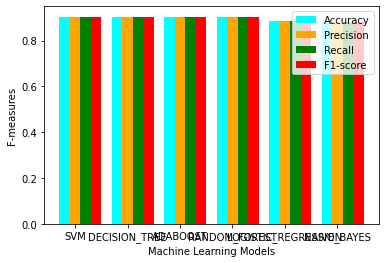

In [28]:
# importing package
import matplotlib.pyplot as plt
import numpy as np
  
# '6' means 6 ML models performance are going to be shown
x = np.arange(6)
width = 0.2
  
# plot data in grouped manner of bar type
plt.bar(x-0.2, accuracies, width, color='cyan')
plt.bar(x, precisions, width, color='orange')
plt.bar(x+0.2, recalls, width, color='green')
plt.bar(x+0.4, f1_scores, width, color='red')

plt.xticks(x, ['SVM', 'DECISION_TREE', 'ADABOOST', 'RANDOM_FOREST', 'LOGISTIC_REGRESSION','NAIVE_BAYES'])
plt.xlabel("Machine Learning Models")
plt.ylabel("F-measures")
plt.legend(["Accuracy", "Precision", "Recall","F1-score"])
plt.show()

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


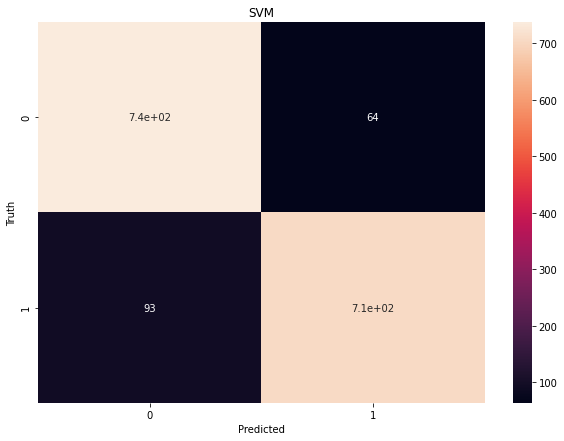

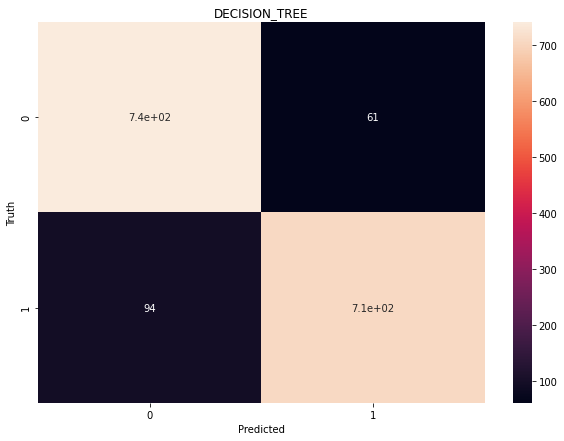

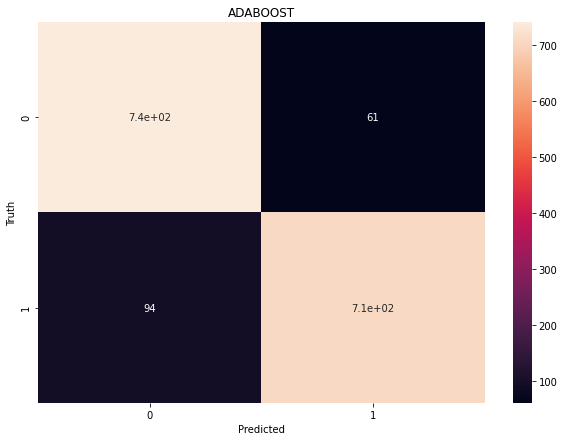

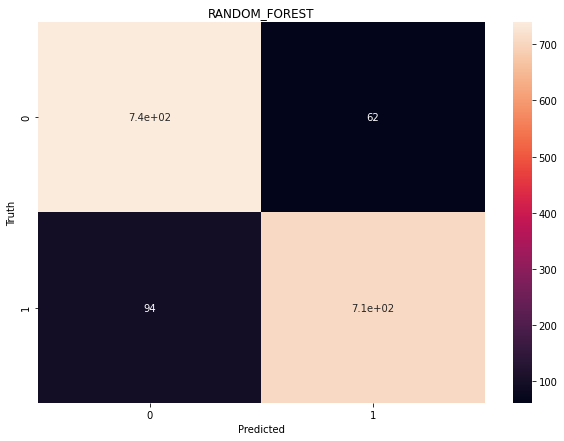

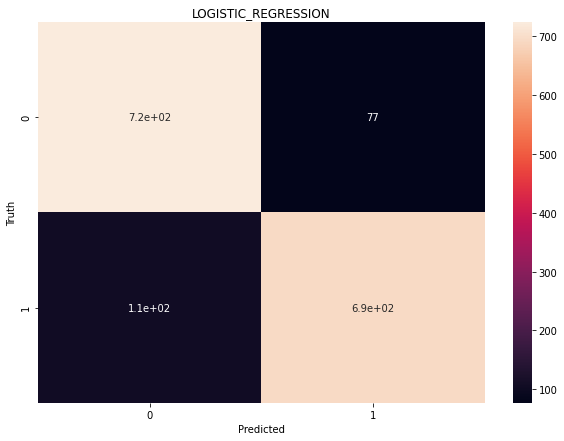

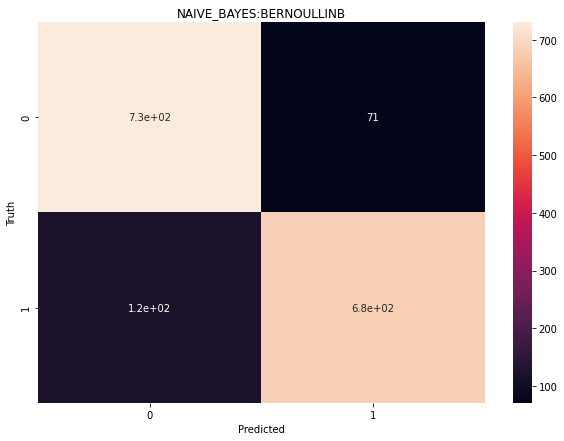

In [30]:
import seaborn as sn
%matplotlib inline
import matplotlib.pyplot as plt

#Confusion matrix of best classification results of the models
for model_name,matrix in ConfusionMatrix.items():
    #print(model_name)
    plt.figure(figsize = (10,7))
    sn.heatmap(matrix, annot=True)
    plt.title(model_name.upper())
    plt.xlabel('Predicted')
    plt.ylabel('Truth')


# TPOT for Automated Machine Learning

##### Reference


*   https://machinelearningmastery.com/tpot-for-automated-machine-learning-in-python/



In [ ]:
pip install tpot

In [ ]:
import tpot
print('tpot: %s' % tpot.__version__)

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from tpot import TPOTClassifier
# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
cv

In [ ]:

# define search
model = TPOTClassifier( generations=10, population_size=50, cv=cv, scoring='f1', verbosity=2, random_state=10, n_jobs=-1)


In [ ]:
# perform the search
model.fit(X, Y)
# export the best model
model.export('tpot_sonar_best_model.py')

## AutoML using Pycaret

In [ ]:
pip install pycaret

In [ ]:
pip install sklearn-genetic

In [ ]:
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from genetic_selection import GeneticSelectionCV

mcc = make_scorer(matthews_corrcoef)
estimator = LogisticRegression(solver = "liblinear", C = 6, tol = 1, fit_intercept = True)

from sklearn.model_selection import *
report = pd.DataFrame()
nofeats = [] 
chosen_feats = [] 
cvscore = [] 
rkf = RepeatedStratifiedKFold(n_repeats = 2, n_splits = 10)
for i in range(2,11):
  
    selector = GeneticSelectionCV(estimator,
                                cv = rkf,
                                verbose = 0,
                                scoring = mcc,
                                max_features = i,
                                n_population = 200,
                                crossover_proba = 0.5,
                                mutation_proba = 0.2,
                                n_generations = 10,
                                crossover_independent_proba=0.5,
                                mutation_independent_proba=0.05,
                                #tournament_size = 3,
                                n_gen_no_change=10,
                                caching=True,
                                n_jobs=-1)
  
    selector = selector.fit(X, Y)
    genfeats = X.columns[selector.support_]
    genfeats = list(genfeats)
    print("Chosen Feats:  ", genfeats)

cv_score = selector.generation_scores_[-1]
nofeats.append(len(genfeats)) 
chosen_feats.append(genfeats) 
cvscore.append(cv_score)





report["No of Feats"] = nofeats
report["Chosen Feats"] = chosen_feats
report["Scores"] = cvscore






In [ ]:
report["Scores"] = np.round(report["Scores"], 3)
report.sort_values(by = "Scores", ascending = False, inplace = False)
#report.index
ga_feats = report.iloc[0]["Chosen Feats"]

used_feats =  ga_feats.copy()
used_feats.append('ClassLabel')

print(report)
print(ga_feats)


In [ ]:
from pycaret.datasets import get_data
from pycaret.classification import *
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import ClusterCentroids,NearMiss, RandomUnderSampler
from imblearn.combine import SMOTEENN,SMOTETomek



ename = setup(data = df[used_feats], target = "ClassLabel", 
              train_size=0.8,
              test_data = None,
              fold_strategy = "stratifiedkfold",
              fold_shuffle = True, 
              use_gpu = True,
              normalize = True,
              categorical_features = None,
              
              #pca = True,
              #pca_method = "kernel",
              #pca_components = 5, 
              preprocess = False,
              html = True,
              #POLYNOMIAL
              #polynomial_features = True,
              #polynomial_degree = 2, 
              #transformation
              
              #transformation = True,
              feature_selection = True, 
              feature_interaction = True,
          
              fix_imbalance = True,
              #fix_imbalance_method  = SMOTE(),
              imputation_type='simple',
              verbose = True,
              )


rskf = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 20)
best_model = compare_models(sort = "MCC", round = 2, 
                            fold = rskf,
                            #include = ["rf","catboost"],
                            #n_select = 1
                            )